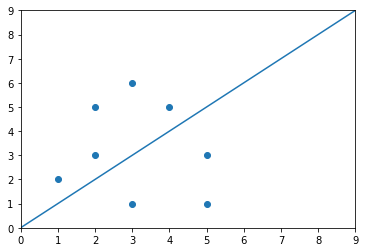

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import c_

sam = np.array([[1,2],[2,3],[2,5],[3,1],[3,6],[4,5],[5,1],[5,3]]) #设定初始的点位
#原始点位图
plt.scatter(sam[:,0], sam[:,1])
plt.plot([0,10],[0,10]) #初始拟合线y=x
plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

$$
Y=\begin{pmatrix} y_1 \\ y_2 \\ .\\.\\ y_n \end{pmatrix}_{nx1},
B=\begin{pmatrix} b \\ w \end{pmatrix}_{2x1},
\\
X = \begin{pmatrix} 1&x_1 \\ 1&x_2 \\ .\\ .\\ 1&x_n \end{pmatrix}_{nx2},
e = \begin{pmatrix} e_1 \\ e_2 \\ .\\.\\ e_n \end{pmatrix}_{nx1}
$$
So we have,
$$
Y = X \cdot B+e
\\
Q = (Y-X\cdot B)^T(Y-X\cdot B)
$$


#### Find the derivative of *Q*
$$
 \frac{\partial Q}{\partial B}=-X^TY+X^TXB=\begin{pmatrix} \frac{\partial Q}{\partial b} \\ \frac{\partial Q}{\partial w} \end{pmatrix}
$$

#### Then, change the B,
$$
B_{t+1} = B_t - lr *  \frac{\partial Q}{\partial B}
$$

In [4]:
#根据上面的公式分别求出Q对B的偏导、变化后的B、残差平方和Q
def deltaB(sam, B_init, lr=0.01):
    X = scipy.c_[np.ones(sam.shape[0]),sam[:,0]]
    Y = sam[:,1]
    Q = np.dot((Y - np.dot(X,B_init)).T,Y - np.dot(X,B_init))
    Q_B = -np.dot(X.T,Y) + np.dot(np.dot(X.T,X),B_init)
    B = B_init - lr * Q_B
    
    return Q_B, B, Q

In [12]:
iter_num = 50
B_init = np.array([0,0])
#以下三个_his用来存放每次生成的值
B_his = B_init
Q_B_his = np.array([0,0])
Q_his = []
for i in range(iter_num):
    sel = np.random.choice(sam.shape[0],6,replace=False) #随机挑选点
    Q_B,B,Q = deltaB(sam[sel], B_his.reshape(2,-1)[:,i])
    Q_B_his = scipy.c_[Q_B_his,Q_B]
    B_his = np.round(scipy.c_[B_his,B],4)
    Q_his.append(Q.tolist())

In [13]:
B_his #每一列代表一个B

array([[0.    , 0.22  , 0.2826, 0.294 , 0.328 , 0.3831, 0.3781, 0.4529,
        0.4841, 0.4817, 0.5771, 0.6303, 0.5813, 0.6462, 0.657 , 0.7139,
        0.6288, 0.7016, 0.715 , 0.7474, 0.7514, 0.7681, 0.8143, 0.839 ,
        0.8292, 0.8894, 0.9461, 0.9288, 0.9131, 0.9658, 0.9948, 1.035 ,
        1.0639, 1.1528, 1.0857, 1.1522, 1.1845, 1.2332, 1.2061, 1.2479,
        1.2588, 1.2686, 1.3475, 1.3432, 1.3303, 1.3467, 1.4361, 1.4101,
        1.4409, 1.4594, 1.4878],
       [0.    , 0.61  , 0.7348, 0.696 , 0.6954, 0.7713, 0.6407, 0.787 ,
        0.7303, 0.6379, 0.8813, 1.0058, 0.6853, 0.8357, 0.8245, 0.9614,
        0.5595, 0.708 , 0.6237, 0.6417, 0.5826, 0.5746, 0.665 , 0.6289,
        0.5004, 0.6109, 0.7398, 0.55  , 0.4342, 0.5151, 0.5005, 0.5211,
        0.5136, 0.7397, 0.4274, 0.5714, 0.5896, 0.6504, 0.4767, 0.4954,
        0.451 , 0.4333, 0.6467, 0.5348, 0.3988, 0.4105, 0.6494, 0.4386,
        0.5001, 0.5201, 0.5121]])

In [14]:
Q_B_his

array([[  0.    , -22.    ,  -6.26  ,  -1.1388,  -3.404 ,  -5.5148,
          0.4959,  -7.4802,  -3.1166,   0.2409,  -9.5413,  -5.3179,
          4.8978,  -6.4915,  -1.0802,  -5.6905,   8.5114,  -7.2752,
         -1.3384,  -3.236 ,  -0.3982,  -1.6744,  -4.6232,  -2.4742,
          0.9831,  -6.0176,  -5.6674,   1.7328,   1.5728,  -5.2716,
         -2.9032,  -4.0232,  -2.8891,  -8.8854,   6.7108,  -6.6474,
         -3.2302,  -4.8698,   2.708 ,  -4.1828,  -1.0908,  -0.9762,
         -7.8889,   0.4322,   1.29  ,  -1.6434,  -8.9413,   2.6046,
         -3.0832,  -1.8529,  -2.8416],
       [  0.    , -61.    , -12.48  ,   3.8796,   0.062 ,  -7.5904,
         13.063 , -14.634 ,   5.6682,   9.2416, -24.3448, -12.4476,
         32.0468, -15.0402,   1.1164, -13.6915,  40.19  , -14.8452,
          8.4304,  -1.804 ,   5.9124,   0.7996,  -9.0409,   3.6088,
         12.8507, -11.0488, -12.8932,  18.9813,  11.576 ,  -8.0861,
          1.4636,  -2.0572,   0.7475, -22.6113,  31.232 , -14.404 ,
         

In [15]:
Q_his

[100.0,
 40.08,
 28.927905199999998,
 27.028375999999998,
 38.01958144,
 27.862971190000003,
 29.635932580000002,
 33.91936526,
 28.143060169999995,
 31.640907869999996,
 21.268070030000004,
 47.01345478,
 28.20794199,
 17.82615024,
 21.87319975,
 33.97505446,
 28.33046484,
 23.635301760000004,
 25.0969052,
 27.3018724,
 26.8969028,
 17.482518940000002,
 32.46771094,
 24.666526129999998,
 35.87418656,
 25.974958559999997,
 35.44256782,
 14.84561664,
 22.143017420000003,
 31.239089799999995,
 31.03969204,
 20.510503750000005,
 24.934459259999997,
 24.821820640000002,
 25.83304822,
 32.6127014,
 28.624063739999997,
 28.62649184,
 27.2443031,
 21.837103339999995,
 24.497939239999997,
 27.272009429999997,
 31.10812778,
 23.272854880000004,
 24.279103820000003,
 24.687001990000002,
 34.125780219999996,
 14.60109494,
 13.947856510000001,
 27.753168560000002]

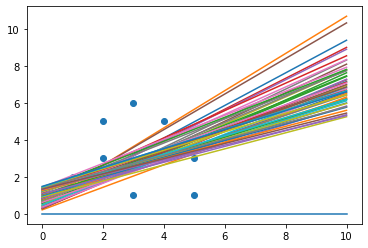

In [16]:
x=np.array([0,10])
y=B_his[0,0]+B_his[1,0]*x #y的初始值
for j in range(1,B_his.shape[1]):
    y = scipy.c_[y,B_his[0,j]+B_his[1,j]*x] #把每个B对应的y放到一起

plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y)
plt.show()

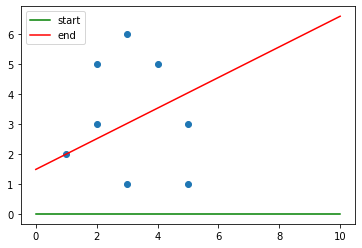

In [17]:
plt.scatter(sam[:,0], sam[:,1])
plt.plot(x,y[:,0],c='g',label='start') #最初始
plt.plot(x,y[:,y.shape[1]-1],c='r',label='end') #最终
plt.legend()

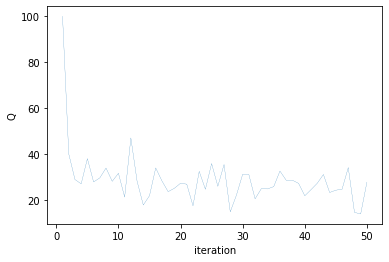

In [18]:
#Q残差平方和图
plt.plot(range(1,iter_num+1),Q_his,linewidth=0.2)
plt.xlabel('iteration')
plt.ylabel('Q')
plt.show()

# let's use some *fit* data

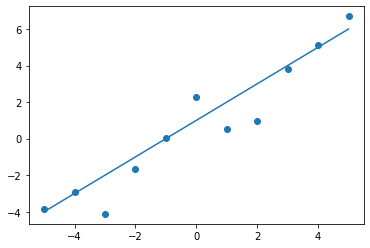

In [20]:
left=-5
right=6
xt = np.arange(left,right)
e = np.random.randn(xt.size)
a=1
b=1
yt = a*xt + b + e
t = np.array([b,a])

plt.scatter(xt,yt)
plt.plot(xt,yt-e)
plt.show()

In [21]:
sam1 = scipy.c_[xt,yt]
sam1

array([[-5.        , -3.87991107],
       [-4.        , -2.93451164],
       [-3.        , -4.12179458],
       [-2.        , -1.65223774],
       [-1.        ,  0.04303698],
       [ 0.        ,  2.2729545 ],
       [ 1.        ,  0.50606848],
       [ 2.        ,  0.94104989],
       [ 3.        ,  3.79291521],
       [ 4.        ,  5.14213417],
       [ 5.        ,  6.69855684]])

$$
Y=\begin{pmatrix} y_1 \\ y_2 \\ .\\.\\ y_{14} \end{pmatrix}_{14x1},
B=\begin{pmatrix} b \\ w \end{pmatrix}_{2x1},
\\
X = \begin{pmatrix} 1&x_1 \\ 1&x_2 \\ .\\ .\\ 1&x_{14} \end{pmatrix}_{14x2},
e = \begin{pmatrix} e_1 \\ e_2 \\ .\\.\\ e_{14} \end{pmatrix}_{14x1}
$$
So we have,
$$
Y = X \cdot B+e
\\
Q = (Y-X\cdot B)^T(Y-X\cdot B)
$$


#### Find the derivative of *Q*
$$
 \frac{\partial Q}{\partial B}=-X^TY+X^TXB=\begin{pmatrix} \frac{\partial Q}{\partial b} \\ \frac{\partial Q}{\partial w} \end{pmatrix}
$$

#### Then, change the B,
$$
B_{t+1} = B_t - lr *  \frac{\partial Q}{\partial B}
$$

In [24]:
#根据上面的公式分别求出Q对B的偏导、变化后的B、残差平方和Q
def deltaB(sam, B_init, lr=0.01):
    X = scipy.c_[np.ones(sam.shape[0]),sam[:,0]]
    Y = sam[:,1]
    Q = np.dot((Y - np.dot(X,B_init)).T,Y - np.dot(X,B_init))
    Q_B = -np.dot(X.T,Y) + np.dot(np.dot(X.T,X),B_init)
    B = B_init - lr * Q_B
    
    return Q_B, B, Q

In [32]:
iter_num = 500
B_init = np.array([7,-1.3])
#以下三个_his用来存放每次生成的值
B_his = B_init
Q_B_his = np.array([0,0])
Q_his = []
for i in range(iter_num):
    sel = np.random.choice(sam1.shape[0],sam1.shape[0]-2,replace=False) #随机挑选点
    Q_B,B,Q = deltaB(sam1[sel], B_his.reshape(2,-1)[:,i])
    Q_B_his = scipy.c_[Q_B_his,Q_B]
    B_his = np.round(scipy.c_[B_his,B],4)
    Q_his.append(Q.tolist())

In [33]:
y = np.array([])

In [34]:
B_his

array([[ 7.    ,  6.4625,  5.9361, ...,  0.6553,  0.6308,  0.6395],
       [-1.3   ,  1.1028,  1.1467, ...,  1.0493,  1.0454,  1.0175]])

In [35]:
y=B_his[0,0]+B_his[1,0]*x #y的初始值
for j in range(1,B_his.shape[1]):
    y = scipy.c_[y,B_his[0,j]+B_his[1,j]*x] #把每个B对应的y放到一起
    
#算y的差：y-yt

In [36]:
y

array([[13.5   ,  0.9485,  0.2026, ..., -4.5912, -4.5962, -4.448 ],
       [-0.8   , 13.0793, 12.8163, ...,  6.9511,  6.9032,  6.7445]])

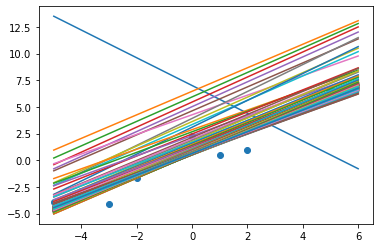

In [37]:
x = np.array([left,right])
plt.scatter(sam1[:,0], sam1[:,1])
plt.plot(x,y)
plt.show()

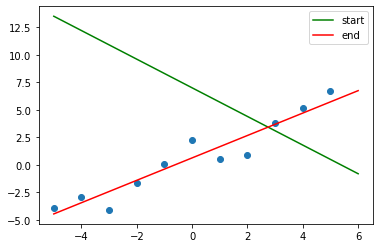

In [38]:
plt.scatter(sam1[:,0], sam1[:,1])
plt.plot(x,y[:,0],c='g',label='start') #最初始
plt.plot(x,y[:,y.shape[1]-1],c='r',label='end') #最终
plt.legend()

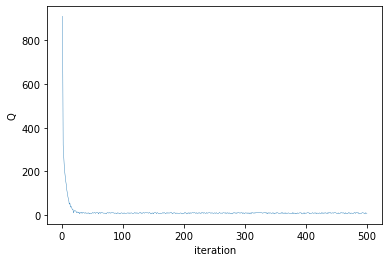

In [39]:
#Q残差平方和图
plt.plot(range(1,iter_num+1),Q_his,linewidth=0.4)
plt.xlabel('iteration')
plt.ylabel('Q')
plt.show()